Homework 4, CS 641     Utsav Shaileshkumar Chokshi

First, import data from the file named mnist23.data. Place the file in the running directory of jupyter notebook for simplicity 

In [1]:
import cloudpickle as pickle
mnist23 = pickle.load( open( "mnist23.data", "rb" ) )

then run the following code to view the data

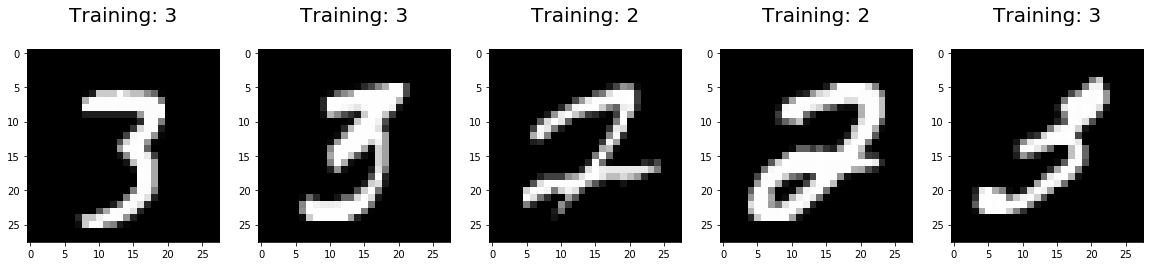

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist23.data[500:505], mnist23.target[500:505])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

mnist23 consists of more than ten thousands images of 2s and 3s. You can view the data as follows:

In [3]:
mnist23,mnist23.data, mnist23.target, mnist23.data.shape


({'COL_NAMES': ['label', 'data'],
  'DESCR': 'mnist23: mnist data 2 and 3',
  'data': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'target': array([ 2.,  2.,  3., ...,  3.,  2.,  3.])},
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([ 2.,  2.,  3., ...,  3.,  2.,  3.]),
 (12111, 784))

In [4]:
mnist23.data.shape, mnist23.target.shape


((12111, 784), (12111,))

In this homework, you are asked to implement your own binary classifier in jupyter notebook to classify the image. Each image is a 28 by 28 image, which is a row of the above numpy ndarray. So you need to reshape it to 8 by 8 to view an image. Implement in the following. You may want to create a python class for your classifier, with train, validate, predict and some other functions

In [9]:
from sklearn import decomposition
class own_classifier():                                  #This is the classifier class which will train the model and predict the class for test data
    
    def reduction(self,data_to_reduce):                  #This function is used to reduce the data to the user-defined dimension
        pca = decomposition.PCA(n_components=16, whiten=True)   #Applying PCA 
        pca.fit(data_to_reduce)
        reduced_data = pca.transform(data_to_reduce)            #The transformed data after application of PCA
        return reduced_data
    
    def train(self,training_data):                      #This function is used to train the model using the given data
        
        mnist23_pca = own_classifier.reduction(self,training_data)     #Reducing the training data using PCA
        var2 = 0
        var3 = 0
        data_for_2 = []
        data_for_3 = [] 

        for k in range(training_data.shape[0]):                                         #Separating the class-2 and class-3 data
            if mnist23.target[k] == 2:
                var2 = var2 + 1
                data_for_2.append(mnist23_pca[k])
            else:
                var3 = var3 + 1 
                data_for_3.append(mnist23_pca[k])

        mean_class_2 = np.mean(data_for_2,axis=0)                      #Finding the mean for class-2 data that will be used in LDA
        mean_class_3 = np.mean(data_for_3,axis=0)                      #Finding the mean for class-3 data that will be used in LDA
        cov = np.cov(mnist23_pca.T)
        invcov = np.linalg.inv(cov)                                    #Finding the inverse of the covariance 
        co= 2*np.dot(mean_class_3 - mean_class_2,invcov)               #Finding the coeifficients for the decision boundary
        const =  -2*np.log(var2/var3)+np.dot(np.dot(mean_class_2,invcov),mean_class_2.T) - np.dot(np.dot(mean_class_3,invcov),mean_class_3.T)
        return co,const                                                #Returning the coeifficients and the constant value
        
    def predict(self, coe, cons, test_data):                             #This function predicts the class for the test data
        reduced_test_data = own_classifier.reduction(self,test_data)   #Reduces the test data to predict the class
        decision_boundary_output = []
        predict_data = []
        for x in range(reduced_test_data.shape[0]):
            output = []
            for k in range(reduced_test_data.shape[1]):
                result = coe[k]*reduced_test_data[x][k] + cons         #Predict's the class using the decision boundary
                output.append(result)
            if sum(output) > 0:                                        #If value of test data in decision boundary is positive than data belongs to class-3
                predicted_class = 3
                predict_data.append(predicted_class)
            elif sum(output) < 0:                                      #If value of test data in decision boundary is negative than data belongs to class-2
                predicted_class = 2
                predict_data.append(predicted_class)
        return predict_data                                            #Returns the predicted class list
    
   
        
tt = own_classifier()                                                  #Creates an object of the class classifier

coeifficient, constant = tt.train(mnist23.data)                        #Trains the model and returnes the coeifficients and constant to use while predicting




Then, in the following, write a separate function so that when new test data is given, then accuracy can be computed. The function will take the test images (in a matrix of shape (x, 784)), and their labels (in a ndarray of shape(x,), and other parameters as you see fit. The test images are not given to you. 
Your numeric grade for the howework will be no more than the percentage of the accuracy of your classifier.  

In [10]:
def accuracy(coeifficient,constant,test_data,original_class):       #This function finds the accuracy of the classifier
    y = tt.predict(coeifficient, constant, test_data)               #Calls the predict function and stores the predicted class
    count = 0
    for k in range(original_class.shape[0]):
        if y[k] == original_class[k]:
            count = count + 1                                       #Counts the correct classified data
    acc = (count/original_class.shape[0])*100                       #Calculates the accuracy
    return acc                                                      #Returns the accuracy


#Enter the test data and their labels as 3rd and 4th parameters respectively of the accuracy function, which is called below.


final = accuracy(coeifficient,constant,mnist23.data[5000:9000],mnist23.target[5000:9000])    #Finds the accuracy of the test data
print("Accuracy is",final,"%")                                                              #Prints the accuracy of the test data

Accuracy is 94.625 %
